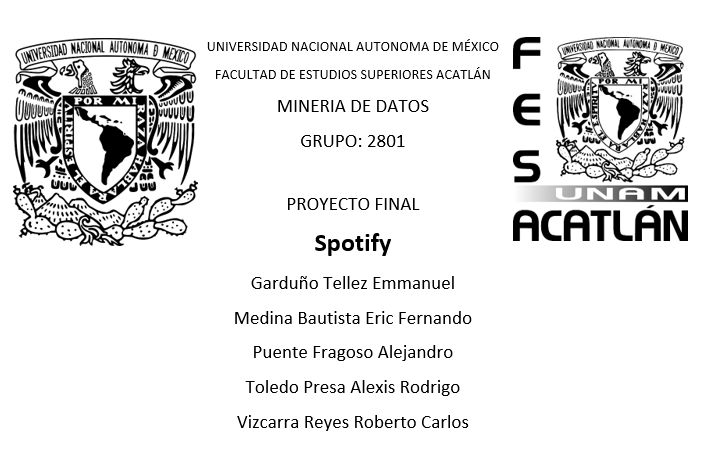

#Spotify

* **Entendimiento del caso de estudio:** 

La música ha cambiado en el transcurso del tiempo, en especial desde inicios del 2010 a la actualidad y se quiere averiguar cuales pueden ser nuevas canciones, en base a ritmo, que tan fácil se pueden bailar, su positividad, la duración, popularidad y que tipo de artista es. Todo ello para llamar la atención a la audiencia y crear nuevas canciones que llamen la atención a la audiencia 

##Kaggle concection

Nos conectamos a kaggle para tomar los datos de Spotify 

In [ ]:
# subir el archivo kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"emmanuelgt","key":"89300e107f4d24207de2282e1a67d07e"}'}

In [ ]:
!pwd

/content


In [ ]:
!ls

 kaggle.json			   'Spotify 2010 - 2019 Top 100 Songs.xlsx'
 sample_data			    spotify-top-100-songs-of-20152019.zip
'Spotify 2010 - 2019 Top 100.csv'


In [ ]:
!mkdir -p ~/.kaggle
!ls ~ -la

total 60
drwx------ 1 root root 4096 May 24 23:05 .
drwxr-xr-x 1 root root 4096 May 24 23:01 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 May 20 23:01 .cache
drwxr-xr-x 1 root root 4096 May 20 23:00 .config
drwxr-xr-x 5 root root 4096 May 20 23:00 .ipython
drwx------ 2 root root 4096 May 20 23:00 .jupyter
drwxr-xr-x 2 root root 4096 May 24 23:05 .kaggle
drwxr-xr-x 2 root root 4096 May 24 23:02 .keras
drwxr-xr-x 1 root root 4096 May 20 23:00 .local
drwxr-xr-x 4 root root 4096 May 20 23:00 .npm
-rw-r--r-- 1 root root  148 Aug 17  2015 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!ls ~/.kaggle/

kaggle.json


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

Descargamos los datos a ocupar

In [ ]:
!kaggle datasets download -d muhmores/spotify-top-100-songs-of-20152019

spotify-top-100-songs-of-20152019.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 kaggle.json			   'Spotify 2010 - 2019 Top 100 Songs.xlsx'
 sample_data			    spotify-top-100-songs-of-20152019.zip
'Spotify 2010 - 2019 Top 100.csv'


Los descomprimimos

In [ ]:
!unzip -q spotify-top-100-songs-of-20152019.zip -d .

replace ./Spotify 2010 - 2019 Top 100 Songs.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls

 kaggle.json			   'Spotify 2010 - 2019 Top 100 Songs.xlsx'
 sample_data			    spotify-top-100-songs-of-20152019.zip
'Spotify 2010 - 2019 Top 100.csv'


In [ ]:
!head 'Spotify 2010 - 2019 Top 100.csv'

﻿title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo
Magic (feat. Rivers Cuomo),B.o.B,atl hip hop,2010,2022‑02‑17,82,93,55,-4,35,79,196,1,34,71,2010,Solo
The Time (Dirty Bit),Black Eyed Peas,dance pop,2010,2022‑02‑17,128,81,82,-8,60,44,308,7,7,75,2010,Band/Group
Imma Be,Black Eyed Peas,dance pop,2009,2022‑02‑17,92,52,60,-7,31,41,258,18,37,71,2010,Band/Group
Talking to the Moon,Bruno Mars,dance pop,2010,2022‑02‑17,146,59,

##1.Know your data

###Import libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

from pandas.api.types import is_string_dtype, is_numeric_dtype

In [ ]:
data = pd.read_csv('Spotify 2010 - 2019 Top 100.csv')

* **Entendimento de los datos:**

De acuerdo con lo dicho en el caso de estudio se va a tomar los valores requeridos, bpm, dnce,	val, dur, pop y	artist type, ya que es lo que vamos a probar para experimentar al tratar de crear la canción

In [ ]:
data.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


In [ ]:
data.tail()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019.0,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data[data['bpm'].notna()]

In [ ]:
data.tail()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
995,SICKO MODE,Travis Scott,hip hop,2018.0,2020‑06‑22,155.0,73.0,83.0,-4.0,12.0,45.0,313.0,1.0,22.0,86.0,2019.0,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019.0,2020‑06‑22,80.0,50.0,55.0,-9.0,80.0,41.0,190.0,23.0,7.0,85.0,2019.0,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019.0,2020‑06‑22,103.0,77.0,89.0,-5.0,9.0,46.0,177.0,1.0,7.0,68.0,2019.0,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019.0,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo


###Data copy

In [ ]:
df = data.copy()
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


In [ ]:
df.tail()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
995,SICKO MODE,Travis Scott,hip hop,2018.0,2020‑06‑22,155.0,73.0,83.0,-4.0,12.0,45.0,313.0,1.0,22.0,86.0,2019.0,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019.0,2020‑06‑22,80.0,50.0,55.0,-9.0,80.0,41.0,190.0,23.0,7.0,85.0,2019.0,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019.0,2020‑06‑22,103.0,77.0,89.0,-5.0,9.0,46.0,177.0,1.0,7.0,68.0,2019.0,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019.0,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1000 non-null   object 
 1   artist         1000 non-null   object 
 2   top genre      1000 non-null   object 
 3   year released  1000 non-null   float64
 4   added          1000 non-null   object 
 5   bpm            1000 non-null   float64
 6   nrgy           1000 non-null   float64
 7   dnce           1000 non-null   float64
 8   dB             1000 non-null   float64
 9   live           1000 non-null   float64
 10  val            1000 non-null   float64
 11  dur            1000 non-null   float64
 12  acous          1000 non-null   float64
 13  spch           1000 non-null   float64
 14  pop            1000 non-null   float64
 15  top year       1000 non-null   float64
 16  artist type    1000 non-null   object 
dtypes: float64(12), object(5)
memory usage: 140.6+ KB


In [ ]:
df.describe()

,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2014.390000,121.262000,69.502000,66.876000,-5.663000,17.911000,50.901000,220.406000,14.36900,10.064000,74.840000,2014.500000
std,3.241359,26.238022,15.961415,13.121921,2.025224,13.431511,21.563399,39.927677,19.45403,9.276743,8.807836,2.873719
min,1975.000000,65.000000,6.000000,19.000000,-18.000000,2.000000,4.000000,113.000000,0.00000,2.000000,35.000000,2010.000000
25%,2012.000000,100.000000,59.000000,59.000000,-7.000000,9.000000,35.000000,197.000000,2.00000,4.000000,70.000000,2012.000000
50%,2014.000000,122.000000,71.000000,68.000000,-5.000000,12.000000,50.500000,216.000000,6.00000,6.000000,76.000000,2014.500000
75%,2017.000000,134.000000,81.250000,75.000000,-4.000000,23.000000,68.000000,237.000000,19.00000,12.000000,81.000000,2017.000000
max,2021.000000,206.000000,98.000000,96.000000,-1.000000,83.000000,97.000000,688.000000,98.00000,53.000000,95.000000,2019.000000


dato atipoco que da eco al analisis 

In [ ]:
df = df.drop(df[df['year released']==1975].index)

In [ ]:
df.isnull().sum()

title            0
artist           0
top genre        0
year released    0
added            0
bpm              0
nrgy             0
dnce             0
dB               0
live             0
val              0
dur              0
acous            0
spch             0
pop              0
top year         0
artist type      0
dtype: int64

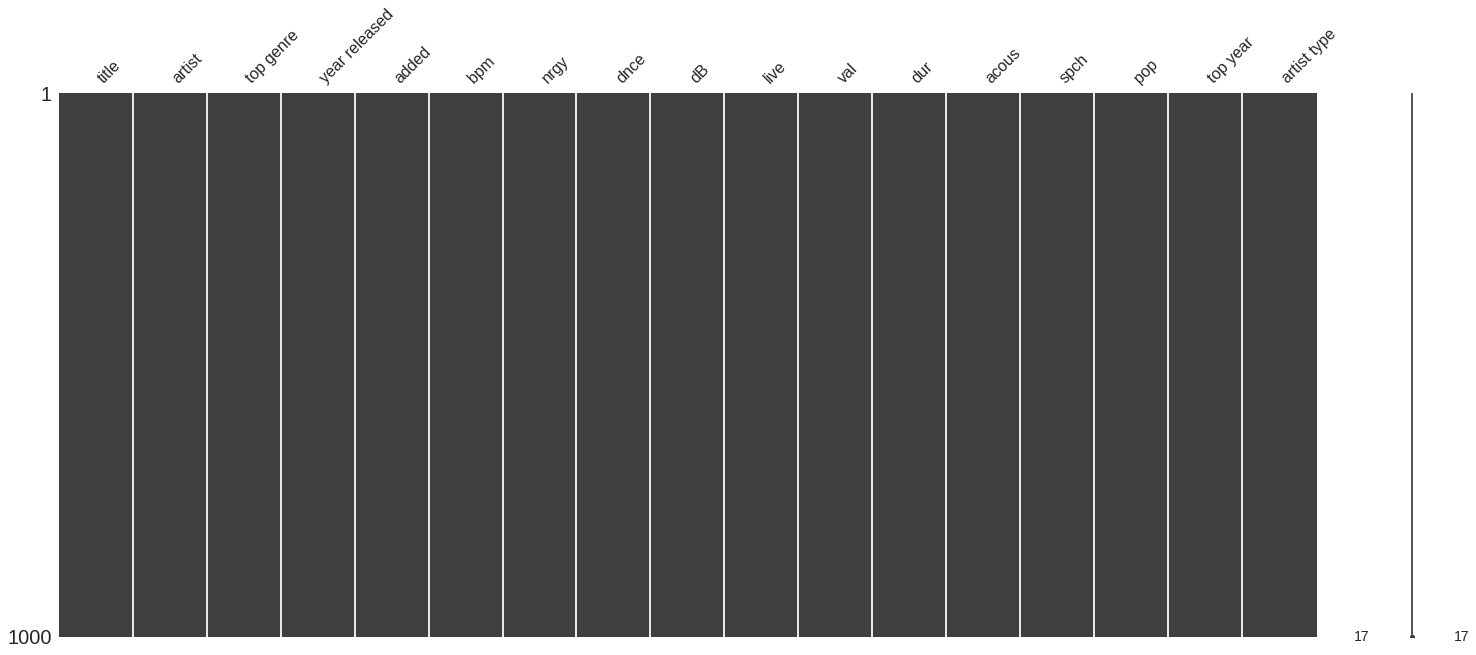

In [ ]:
msno.matrix(df)

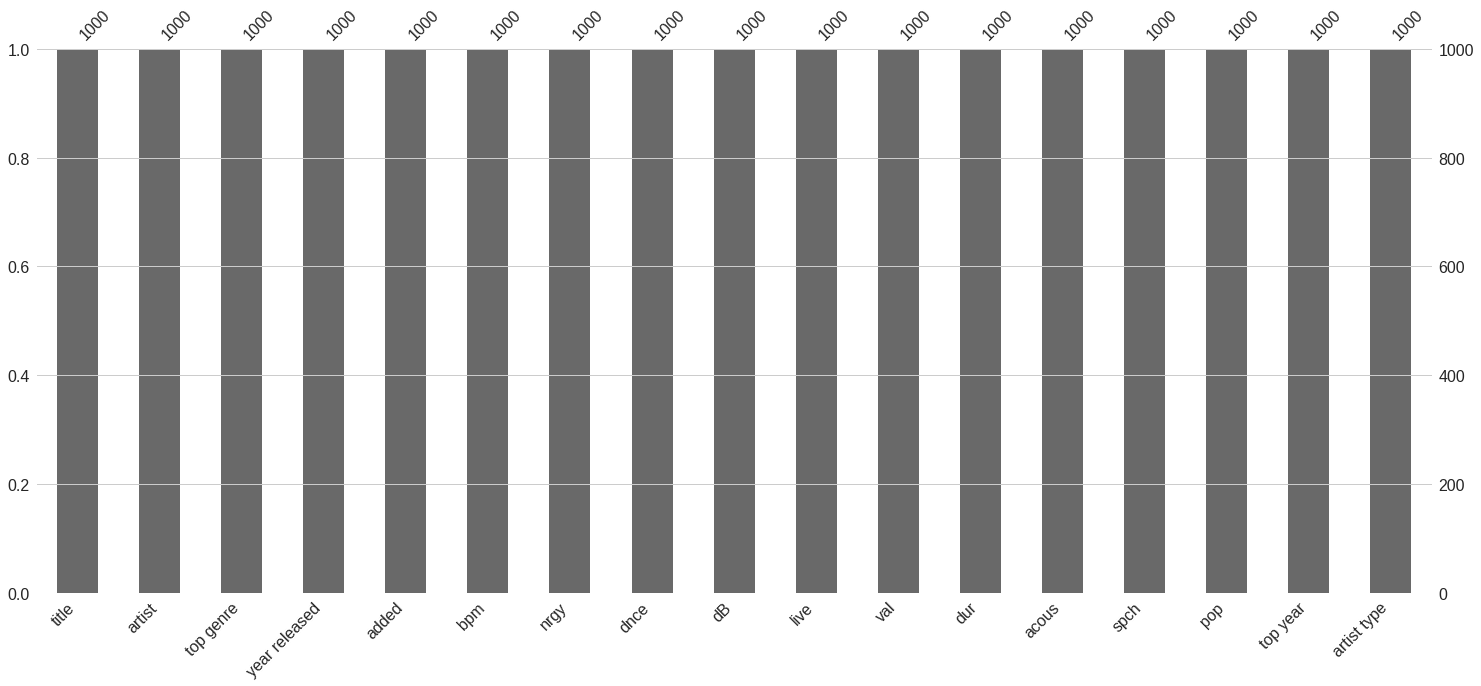

In [ ]:
msno.bar(df)

##2.Feature engineering

###Drop redundant variables

* **Procesamiento de los datos:**

Se procesaran los datos y eleminaron datos en concreto como los ultimos datos llenos de NaN y una cancion atipoca que hacia que un modelo de prueba se hiciese mas pequeño 

Las variables que se eliminaron por que no tienen un sentido o peso en caso que analisamos, por eso el titulo, el artista, fecha en la que se agrego (added), top year y el year relase

In [ ]:
df.drop(columns=['title', 'artist','added','year released', 'top year'], axis=1, inplace=True)

Los vaores de decibeles, acustica, tienen valores negativos y algo dificiles de interpretar similar en los datos, energia, el top de genero y los demás variables

In [ ]:
df.drop(columns=['dB', 'acous'], axis=1, inplace=True)

In [ ]:
df.drop(columns=['nrgy', 'live','spch'], axis=1, inplace=True)

In [ ]:
df.drop(columns=['top genre'], axis=1, inplace=True)

Se ve el encabezado y la grafica de datos, para visualizar si estan completos

In [ ]:
df.head()

,bpm,dnce,val,dur,pop,artist type
0,140.0,61.0,23.0,203.0,70.0,Duo
1,138.0,68.0,83.0,192.0,68.0,Duo
2,95.0,84.0,96.0,243.0,72.0,Solo
3,93.0,66.0,38.0,180.0,80.0,Solo
4,104.0,69.0,74.0,268.0,79.0,Solo


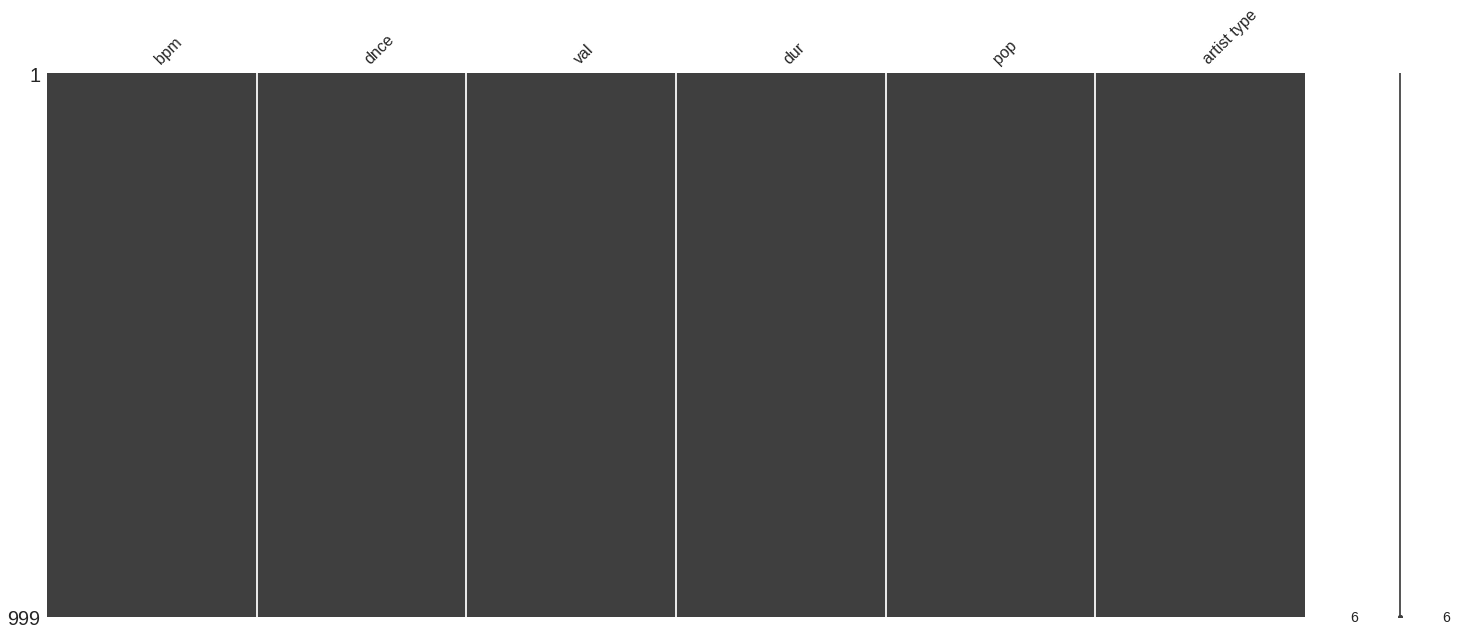

In [ ]:
msno.matrix(df)

##3.Univariante analysis

Analisamos los datos por medio de graficos, para ver su comportamiento

In [ ]:
numerical = []
categorical = []

for column in df:
  if is_numeric_dtype(df[column]):
    numerical.append(column)
  
  elif is_string_dtype(df[column]):
    categorical.append(column)

print('numerical variables: ', numerical)
print('categorical variables: ', categorical)

numerical variables:  ['bpm', 'dnce', 'val', 'dur', 'pop']
categorical variables:  ['artist type']


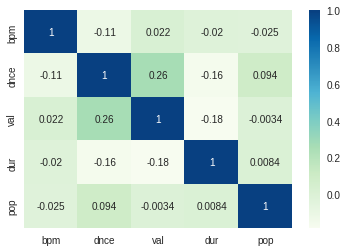

In [ ]:
# numerical vs numerical → heatmap
correlation = df.corr()
sns.heatmap(correlation, cmap='GnBu', annot=True)

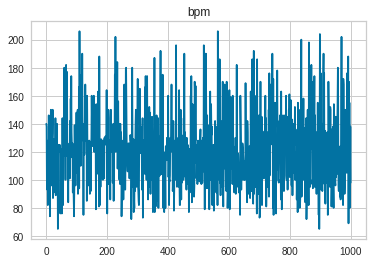

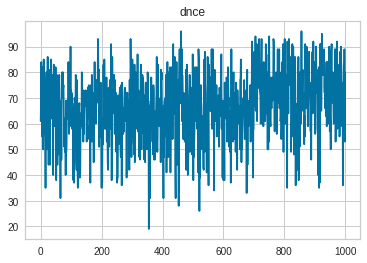

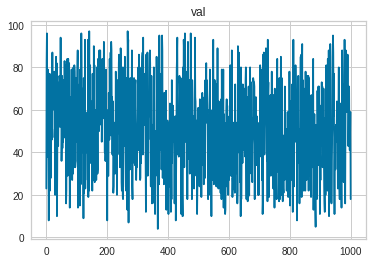

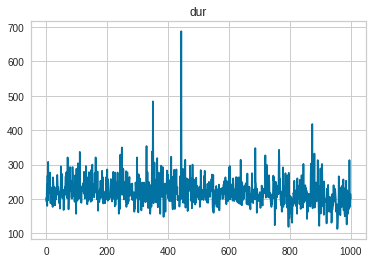

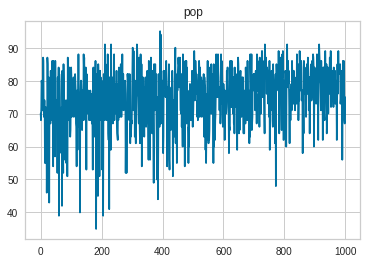

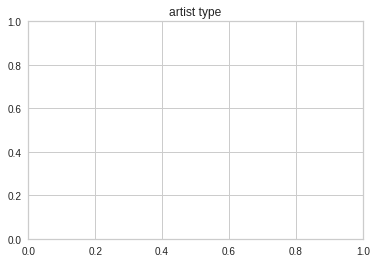

In [ ]:
for column in df:
  plt.figure(column)
  plt.title(column)

  # numerical variables → histogram
  if column in numerical:
    df[column].plot(kind='line')

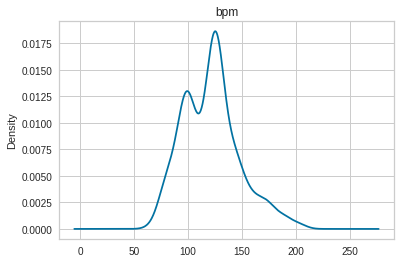

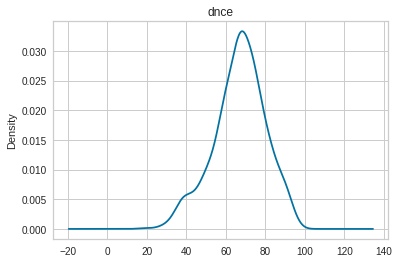

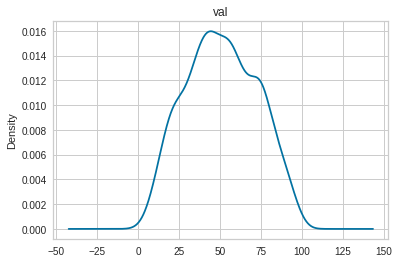

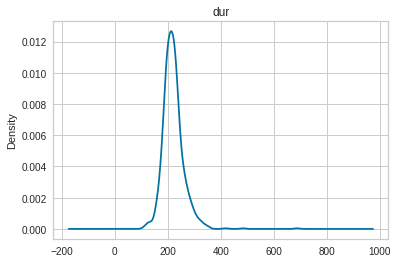

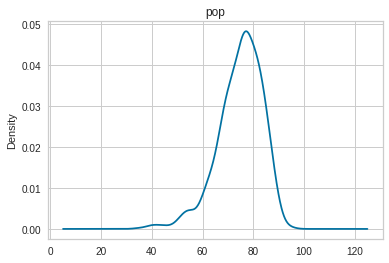

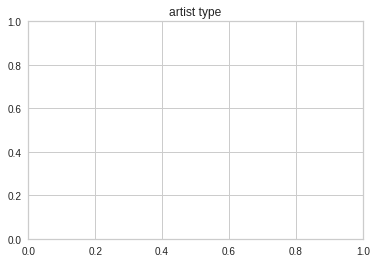

In [ ]:
for column in df:
  plt.figure(column)
  plt.title(column)

  # numerical variables → histogram
  if column in numerical:
    df[column].plot(kind='density')

##4.Tranformacion

Los datos categoricos con ayuda de One-hot se pasan a datos numericos, para despues aplicar min-max a todos los datos

In [ ]:
#One-Hot
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df['ArtistType']=label_encoder.fit_transform(df['artist type'])

In [ ]:
df.drop(columns=['artist type'], axis=1, inplace=True)

In [ ]:
df1 = df.copy()
df1.head()

,bpm,dnce,val,dur,pop,ArtistType
0,140.0,61.0,23.0,203.0,70.0,1
1,138.0,68.0,83.0,192.0,68.0,1
2,95.0,84.0,96.0,243.0,72.0,2
3,93.0,66.0,38.0,180.0,80.0,2
4,104.0,69.0,74.0,268.0,79.0,2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler

In [ ]:
for column in df1:
  scaler = MinMaxScaler()
  df1[column] = scaler.fit_transform(df[[column]])

In [ ]:
df1.head()

,bpm,dnce,val,dur,pop,ArtistType
0,0.531915,0.545455,0.204301,0.156522,0.583333,0.333333
1,0.517730,0.636364,0.849462,0.137391,0.550000,0.333333
2,0.212766,0.844156,0.989247,0.226087,0.616667,0.666667
3,0.198582,0.610390,0.365591,0.116522,0.750000,0.666667
4,0.276596,0.649351,0.752688,0.269565,0.733333,0.666667


Se copian los datos por seguridad en df2

In [ ]:
df2 = df1.copy()
df2.head()

,bpm,dnce,val,dur,pop,ArtistType
0,0.531915,0.545455,0.204301,0.156522,0.583333,0.333333
1,0.517730,0.636364,0.849462,0.137391,0.550000,0.333333
2,0.212766,0.844156,0.989247,0.226087,0.616667,0.666667
3,0.198582,0.610390,0.365591,0.116522,0.750000,0.666667
4,0.276596,0.649351,0.752688,0.269565,0.733333,0.666667


##5.Modelado: Kmeans

* **Modelado:**

Se impementara Kmeans con la variables dadas inicialmente sin nunguna reduccion y luego se volvera a aplicar lo mismo, pero con una reduccion a 2 dimenciones

Hacemos un escalado para Kmeans y de ajuste jerarquico

In [ ]:
from sklearn.preprocessing import scale

scaled_1 = scale(df2)

scaler = MinMaxScaler()
scaled_2 = scaler.fit_transform(df2)

# Muestro las primeras 5 filas escaladas con scale
print("Escalado con scale:")
print(scaled_1[1:6,])

# Muestro las primeras 5 filas escaladas con Min-Max
print("\nEscalado con Min-Max:")
print(scaled_2[1:6,])


Escalado con scale:
[[ 0.63903715  0.08372119  1.48854108 -0.71209228 -0.77635911 -0.78247567]
 [-1.00042288  1.30582119  2.0919208   0.57244212 -0.32220437  0.50744709]
 [-1.07667684 -0.06904131 -0.60008104 -1.01433567  0.5861051   0.50744709]
 [-0.65728009  0.16010244  1.07081665  1.20211585  0.47256642  0.50744709]
 [-1.49607359 -0.90923506  1.30288578 -0.61134449 -0.43574306  0.50744709]]

Escalado con Min-Max:
[[0.5177305  0.63636364 0.84946237 0.1373913  0.55       0.33333333]
 [0.21276596 0.84415584 0.98924731 0.22608696 0.61666667 0.66666667]
 [0.19858156 0.61038961 0.3655914  0.11652174 0.75       0.66666667]
 [0.27659574 0.64935065 0.75268817 0.26956522 0.73333333 0.66666667]
 [0.12056738 0.46753247 0.80645161 0.14434783 0.6        0.66666667]]


Creamos el contnedor que guarda cuantos clusters se van a rear, donde se van a pone inicialmente, cuantas veces va a correr y la semilla de aleatorizacion

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=4, init='random',
    n_init=20, random_state=0
)

Agregamos y vemos la prediccion cmo n arreglo

In [ ]:
y_km = km.fit_predict(scaled_1)

In [ ]:
print(y_km)

[0 1 1 2 1 1 3 3 0 2 3 1 2 0 0 0 0 1 1 1 1 0 2 1 1 1 3 2 1 2 1 2 1 1 1 0 2
 1 2 2 1 0 1 1 1 1 1 1 2 1 2 2 1 1 3 0 1 1 3 3 1 1 0 2 0 0 0 1 0 1 0 1 1 3
 3 1 1 3 0 1 0 3 0 3 0 0 2 1 0 3 1 2 1 3 1 2 2 0 1 3 2 2 1 1 2 2 2 0 3 0 0
 1 0 2 0 1 1 0 0 1 1 0 2 3 3 3 1 1 0 0 0 0 0 2 0 1 0 1 0 3 3 3 3 3 3 1 2 1
 2 1 0 0 1 1 1 0 1 1 1 0 3 0 0 2 0 2 1 0 2 2 1 1 3 2 3 1 3 1 3 1 2 1 0 3 1
 1 2 1 1 3 3 1 3 1 3 3 1 2 0 0 2 1 0 0 3 3 1 2 1 1 1 1 0 1 1 0 1 0 1 0 3 3
 0 0 3 0 2 0 1 1 3 2 2 3 3 1 0 3 1 3 3 1 2 0 1 1 1 2 2 1 0 0 0 0 3 1 0 2 1
 3 3 0 0 3 1 1 3 1 3 3 0 3 1 3 2 2 1 1 2 2 1 1 0 0 1 2 3 2 1 3 3 3 3 3 0 2
 2 0 3 1 0 1 3 3 1 2 0 0 3 0 3 3 1 0 1 1 1 2 1 0 1 1 0 1 0 1 0 0 1 2 1 0 1
 2 1 1 1 1 3 1 0 1 3 3 2 1 0 0 0 2 2 2 2 1 0 0 3 2 2 0 2 2 3 1 2 3 0 1 2 3
 0 1 3 3 3 0 3 3 2 2 1 1 0 0 2 1 0 2 1 2 3 3 3 3 2 1 2 2 1 0 3 3 0 0 3 2 1
 2 2 2 0 0 1 0 0 1 1 0 3 3 3 3 0 0 3 2 0 0 3 1 1 3 2 2 0 2 0 1 1 1 2 1 2 0
 2 1 2 0 2 1 2 3 3 0 3 1 3 1 2 1 2 1 1 2 1 1 1 3 3 3 3 2 3 3 1 1 0 1 2 1 1
 2 3 0 0 0 2 0 1 1 3 2 0 

Imprimomos el grafico con y_km y los centroides

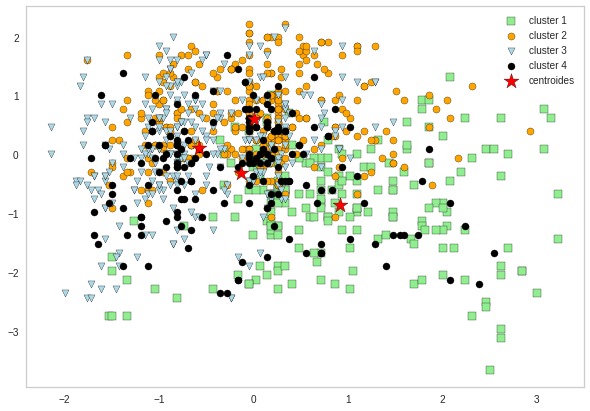

In [ ]:
import matplotlib.pyplot as plt

#configuro el tamaño del grafico final
plt.figure(figsize=(10,7))

#scatter del primer cluster
plt.scatter(
    scaled_1[y_km == 0, 0], scaled_1[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
#scatter del segundo cluster
plt.scatter(
    scaled_1[y_km == 1, 0], scaled_1[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
#scatter del tercer cluster
plt.scatter(
    scaled_1[y_km == 2, 0], scaled_1[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
#scatter del cuarto cluster
plt.scatter(
    scaled_1[y_km == 3, 0], scaled_1[y_km == 3, 1],
    s=50, c='black',
     edgecolor='black',
    label='cluster 4'
)
#scatter del los centroides
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroides'
)
#le pongo la leyenda
plt.legend(scatterpoints=1)
#hace una grilla en el grafico
plt.grid()
#lo imprime en pantalla
plt.show()

###Algoritmo de ajuste jerarquico

Importamos librerias necesarias

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

preparamos el linkage con el escaled_2 y el metodo 'single'

In [ ]:
H = linkage(scaled_2, 'single')

Podemos ver la matriz de distancias

In [ ]:
from scipy.spatial.distance import pdist, squareform

squareform(pdist(scaled_2[0:6,]))

array([[0.        , 0.65282144, 0.96139516, 0.5308777 , 0.72325695,
        0.8058542 ],
       [0.65282144, 0.        , 0.52834012, 0.69871915, 0.47944973,
        0.54931952],
       [0.96139516, 0.52834012, 0.        , 0.68816921, 0.33687535,
        0.43671395],
       [0.5308777 , 0.69871915, 0.68816921, 0.        , 0.42561505,
        0.49409149],
       [0.72325695, 0.47944973, 0.33687535, 0.42561505, 0.        ,
        0.30618684],
       [0.8058542 , 0.54931952, 0.43671395, 0.49409149, 0.30618684,
        0.        ]])

Y ver el deograma generado

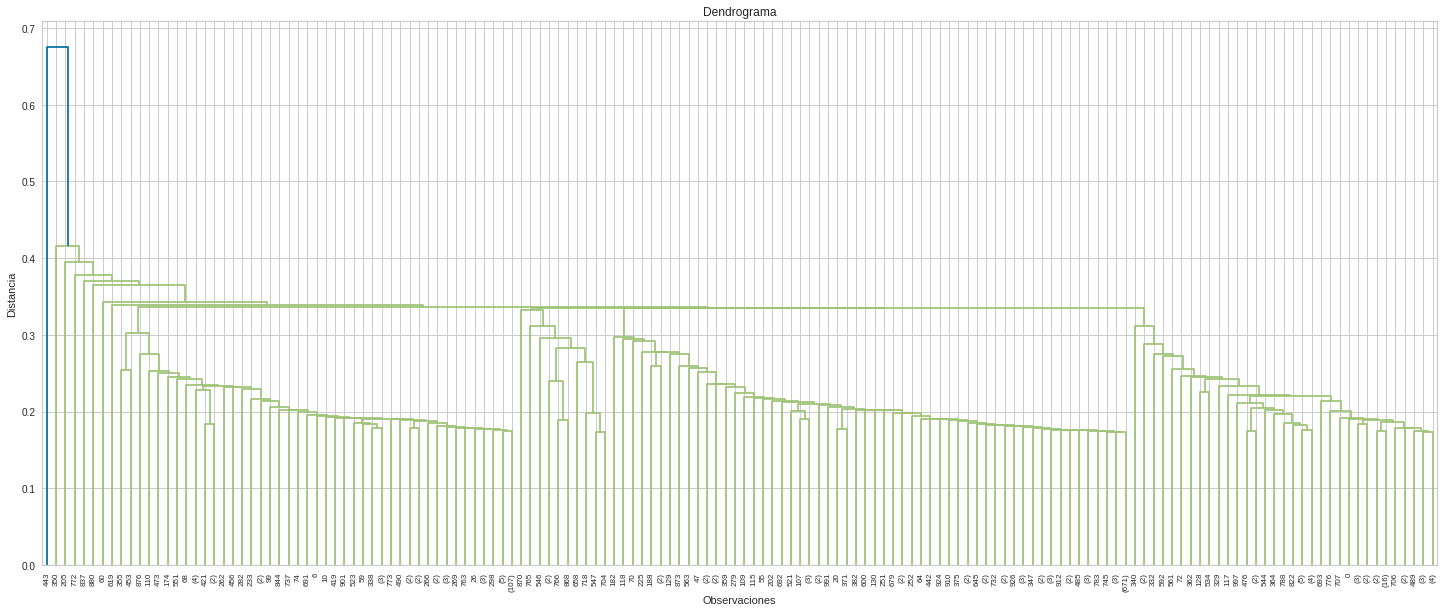

In [ ]:
max_d = 7.08
plt.figure(figsize=(25, 10))
plt.title('Dendrograma')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    H, truncate_mode='lastp',
    p=150, leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=max_d, c='k')
plt.show()

###Metricas de evaluacion del Clustering

* **La evaluacion:** 

La evaluacion sera por medio del codo de Jambu, que consuste en verificar la suma de cuadrados del error para el número de clusters y ver cual brinda el mejor agrupamiento

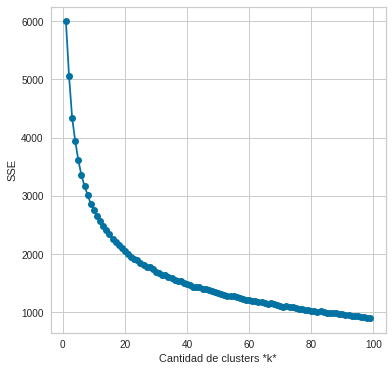

In [ ]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 100))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_1)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters *k*')
plt.ylabel('SSE');

In [ ]:
from sklearn.metrics import silhouette_score

list_k = list(range(2, 100))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(scaled_1)
    centers = clusterer.cluster_centers_

    score = silhouette_score (scaled_1, preds)
    print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

For n_clusters =2 silhouette score is 0.1663152528180297
For n_clusters =3 silhouette score is 0.17428436653148355
For n_clusters =4 silhouette score is 0.1682384854967265
For n_clusters =5 silhouette score is 0.17215249598044152
For n_clusters =6 silhouette score is 0.1772982318389366
For n_clusters =7 silhouette score is 0.17289022001898827
For n_clusters =8 silhouette score is 0.16938424304745633
For n_clusters =9 silhouette score is 0.17011756911558956
For n_clusters =10 silhouette score is 0.15407400476485503
For n_clusters =11 silhouette score is 0.1562300864873164
For n_clusters =12 silhouette score is 0.15174524058372837
For n_clusters =13 silhouette score is 0.14078448160141083
For n_clusters =14 silhouette score is 0.1493424539401336
For n_clusters =15 silhouette score is 0.14688916067670293
For n_clusters =16 silhouette score is 0.14924156919188677
For n_clusters =17 silhouette score is 0.14935291560714414
For n_clusters =18 silhouette score is 0.14959023832475069
For n_clus

Y podemos graficar el gráfico de silueta, por ejemplo, para k=4:
El cual vemos que no es uy bueno

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ecf9677d0>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=0))

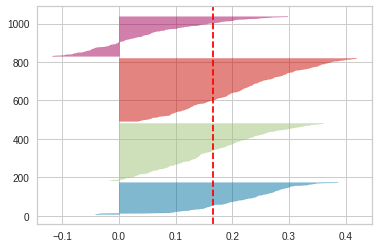

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Genero un modelo con K=4
model = KMeans(4, random_state=0)

# Ploteo el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(scaled_1)    

##5.1Modelado Kmeans reducido

* **Validación:** 

Se valirada con el modelado Kmeans reducido, con la observacion de su grafico y ver si son similares

Importamos librerias 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [ ]:
wcss = []

for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, max_iter=100);
    kmeans.fit(df2);
    wcss.append(kmeans.inertia_);

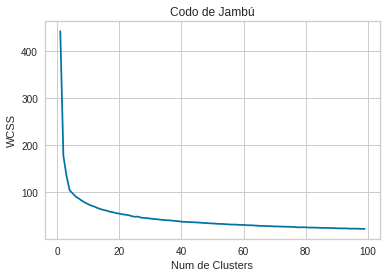

In [ ]:
plt.plot(range(1, 100), wcss)
plt.title("Codo de Jambú")
plt.xlabel("Num de Clusters")
plt.ylabel("WCSS")#quetan similar son los datos
plt.show()

Creamos el contnedor que guarda cuantos clusters se van a rear, donde se van a pone inicialmente, cuantas veces va a correr y la semilla de aleatorizacion

In [ ]:
clustering = KMeans(n_clusters=4, max_iter=300)
clustering.fit(df2)

KMeans(n_clusters=4)

In [ ]:
Agregamos a df2 los labels con el nombre KMeans_Clusters 

In [ ]:
df2["KMeans_Clusters"] = clustering.labels_
df2.head()

,bpm,dnce,val,dur,pop,ArtistType,KMeans_Clusters
0,0.531915,0.545455,0.204301,0.156522,0.583333,0.333333,0
1,0.517730,0.636364,0.849462,0.137391,0.550000,0.333333,3
2,0.212766,0.844156,0.989247,0.226087,0.616667,0.666667,3
3,0.198582,0.610390,0.365591,0.116522,0.750000,0.666667,1
4,0.276596,0.649351,0.752688,0.269565,0.733333,0.666667,3


Escalamos a dos dimenciones y agregamos KMeans_Clusters

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_frame = pca.fit_transform(df2)
pca_frame_df = pd.DataFrame(data = pca_frame, columns=['Componente_1', 'Componente_2'])
pca_nombres = pd.concat([pca_frame_df, df2['KMeans_Clusters']], axis=1)

pca_nombres

,Componente_1,Componente_2,KMeans_Clusters
0,1.678530,0.255900,0.0
1,-1.377013,0.165969,3.0
2,-1.407141,-0.223712,3.0
3,0.661874,-0.120802,1.0
4,-1.363113,-0.166795,3.0
...,...,...,...
995,0.660474,-0.091347,0.0
996,0.639191,-0.191304,1.0
997,-0.344724,0.237884,1.0
998,0.683428,-0.156228,2.0


Borramos los datos que causas eco (los NaN)

In [ ]:
pca_nombres = pca_nombres[pca_nombres['Componente_1'].notna()]

In [ ]:
pca_nombres = pca_nombres[pca_nombres['KMeans_Clusters'].notna()]

Cambiamos los valores de KMeans_Clusters de doubles a int, para poder graficar con colores

In [ ]:
pca_nombres['KMeans_Clusters'] = pca_nombres['KMeans_Clusters'].astype(int)

In [ ]:
pca_nombres

,Componente_1,Componente_2,KMeans_Clusters
0,1.678530,0.255900,0
1,-1.377013,0.165969,3
2,-1.407141,-0.223712,3
3,0.661874,-0.120802,1
4,-1.363113,-0.166795,3
...,...,...,...
994,1.651178,-0.135900,3
995,0.660474,-0.091347,0
996,0.639191,-0.191304,1
997,-0.344724,0.237884,1


In [ ]:
pca_nombres.describe()

,Componente_1,Componente_2,KMeans_Clusters
count,998.000000,998.000000,998.000000
mean,0.001395,0.000232,1.656313
std,1.135255,0.260907,1.122897
min,-1.407141,-0.548237,0.000000
25%,-1.344478,-0.162462,1.000000
50%,-0.300973,-0.106463,2.000000
75%,0.693800,-0.000082,3.000000
max,1.733498,0.697742,3.000000


Graficamos el modelo kmeans reducido y vemos si tiene algun parecido

<function matplotlib.pyplot.show>

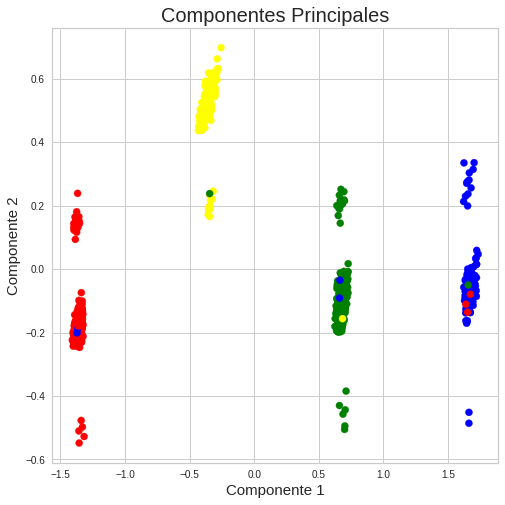

In [ ]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize=20)

color_theme = np.array(["blue", "green","yellow","red","black"])
ax.scatter(x = pca_nombres.Componente_1, y = pca_nombres.Componente_2,
           c = color_theme[pca_nombres.KMeans_Clusters], s=50)
plt.show

En conclusion no se parecen o asemejan a nada los dos modelados, por lo tanto es un mal modelado para los datos, los datos de entrada son erroneos o los datos son insuficientes